# CH.02 - 2.5.2.1

In [ ]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
plt.rcParams["figure.figsize"] = [15,5]

In [2]:
rawdatapth = "data/raw/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [3]:
accraw = pd.read_csv(rawdatapth+"Accelerometer.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [4]:
gyraw = pd.read_csv(rawdatapth+"Gyroscope.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

In [5]:
lightraw= pd.read_csv(rawdatapth+"Light.csv")
lightfeatures = list()
for col in lightraw:
    if (col != timecol):
        lightfeatures.append(col)
lightfeatures

['Illuminance (lx)']

In [6]:
locraw = pd.read_csv(rawdatapth+"Location.csv")
locfeatures = list()
for col in locraw:
    if (col != timecol) and \
    (col != "Satellites") and \
    (col != "Height (m)") and \
    (col != "Direction (°)") and \
    (col != "Horizontal Accuracy (m)") and \
    (col != "Vertical Accuracy (m)"):
        locfeatures.append(col)
locfeatures

['Latitude (°)', 'Longitude (°)', 'Velocity (m/s)']

In [7]:
magraw= pd.read_csv(rawdatapth+"Magnetometer.csv")
magfeatures = list()
for col in magraw:
    if (col != timecol) and \
    (col != "Absolute field (µT)"):
        magfeatures.append(col)
magfeatures

['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)']

In [8]:
granularities = [60000, 250]
datasets = []

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from Label.csv
Figure saved to figures\figure_1.png


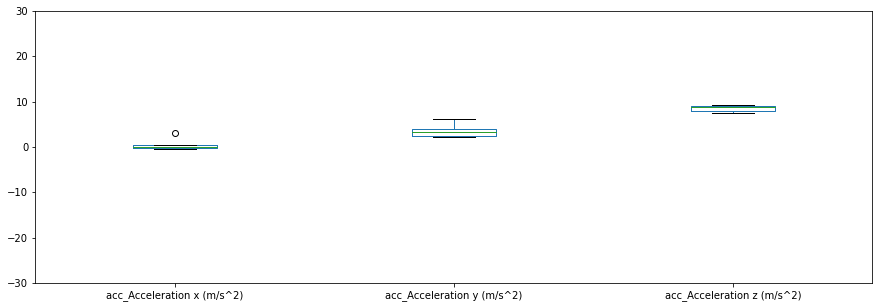

Figure saved to figures\figure_2.png


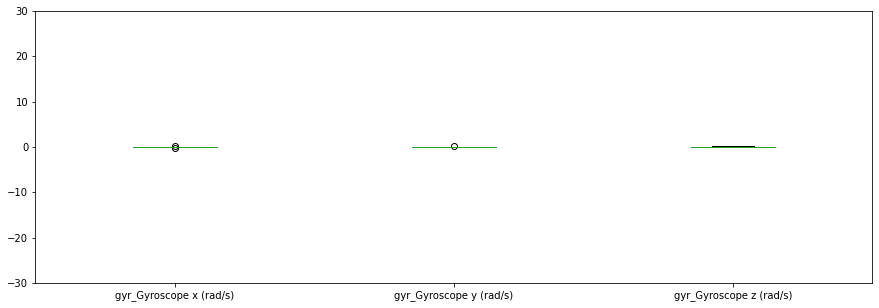

Figure saved to figures\figure_3.png


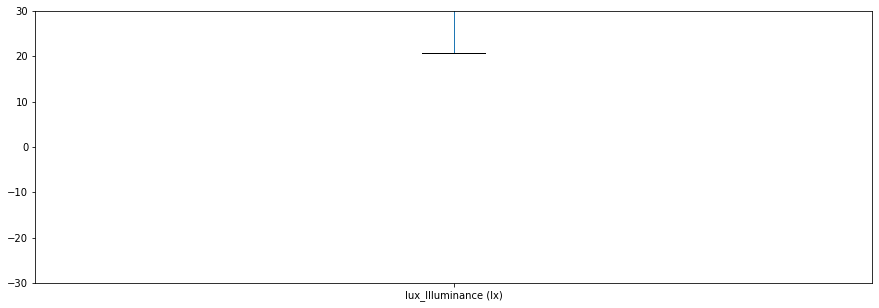

Figure saved to figures\figure_4.png


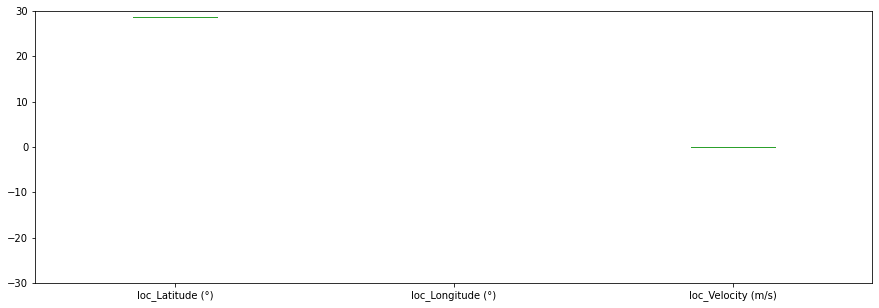

Figure saved to figures\figure_5.png


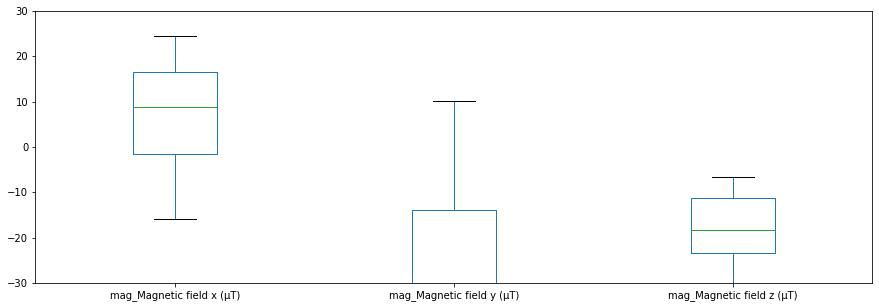

C:\Users\Helia\OneDrive\VU-Cources\Machine-Learning-for-the-Quantified-Self\assignments\ML4QS\assignment01\util\VisualizeDataset.py:106: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  max(max_values) + 0.1*(max(max_values) - min(min_values))])


Figure saved to figures\figure_6.png


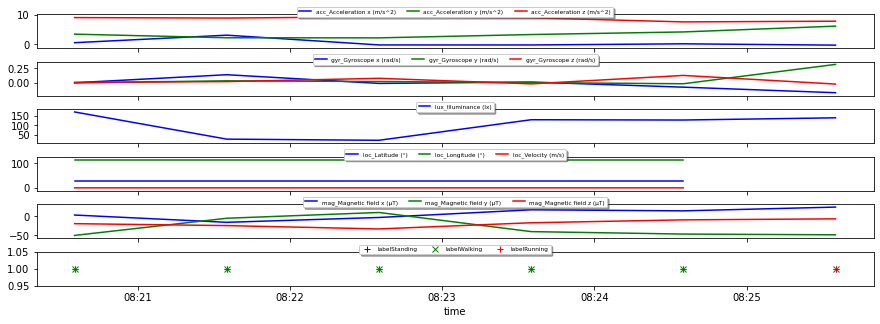

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelStanding  labelWalking  labelRunning
count                    6.000                    6.000                    6.000                 6.000             5.000              5.000               5.000                      6.000                      6.000                      6.000            6.0           6.0           6.0
mean                    -0.018                    0.060                    0.032               101.776            28.707            115.906               0.005                      6.743                    -30.346                    -18.454            1.0           1.0           1.0
std                      0.103                    0.127                    0.059                62.298             0.000              0.000         

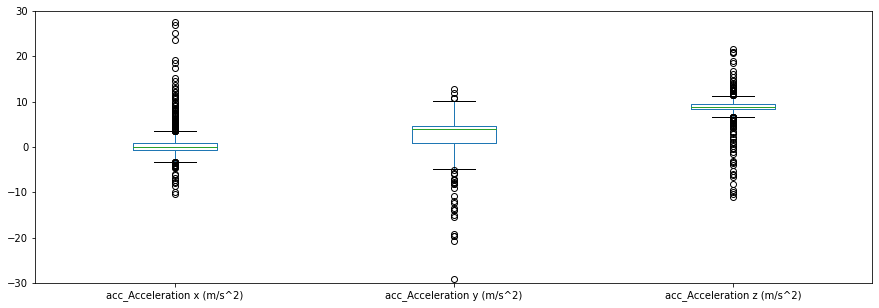

Figure saved to figures\figure_2.png


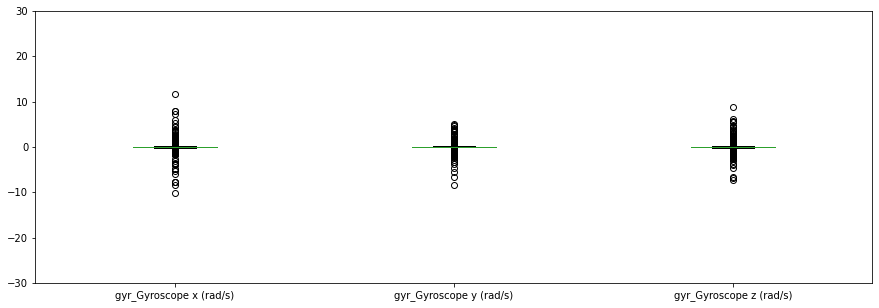

Figure saved to figures\figure_3.png


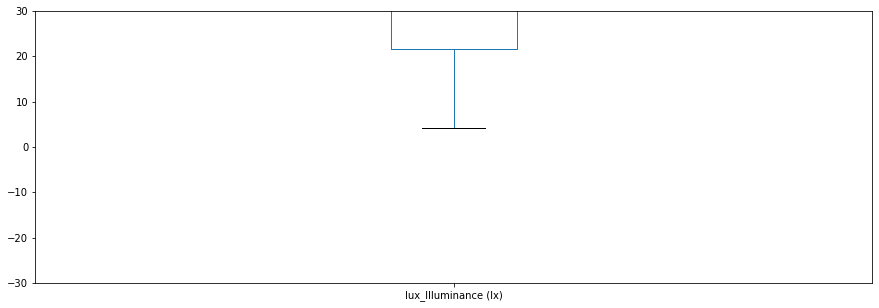

Figure saved to figures\figure_4.png


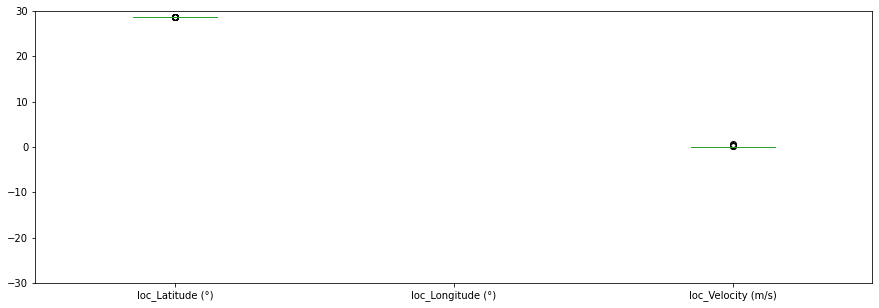

Figure saved to figures\figure_5.png


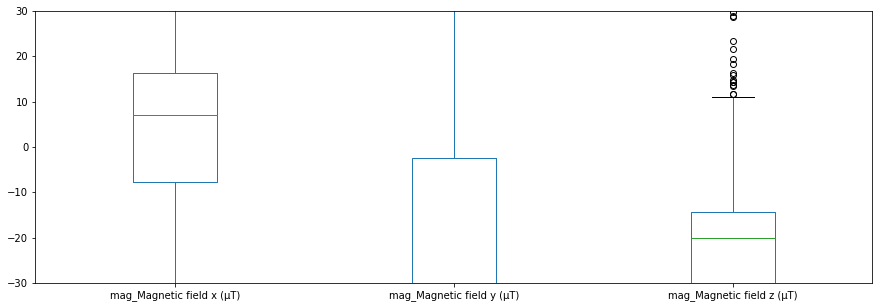

Figure saved to figures\figure_6.png


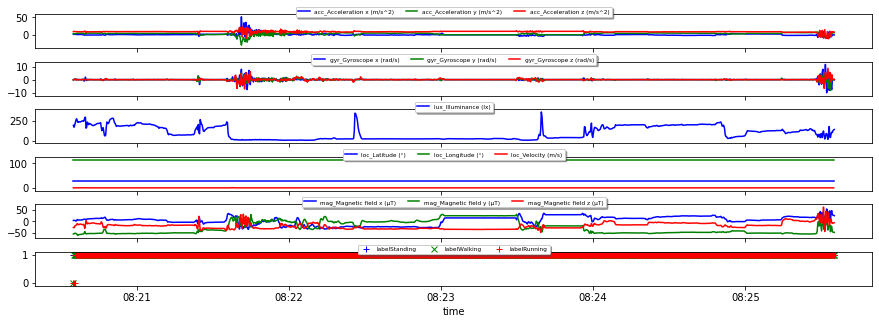

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelStanding  labelWalking  labelRunning
count                 1201.000                 1201.000                 1201.000              1200.000           298.000            298.000             298.000                   1201.000                   1201.000                   1201.000         1201.0      1201.000      1201.000
mean                     0.013                    0.008                    0.042                94.309            28.707            115.906               0.005                      3.228                    -26.639                    -20.789            1.0         0.999         0.998
std                      1.006                    0.692                    0.816                80.300             0.000              0.000         

In [9]:
for g in granularities:
    
    Dataset = CreateDataset(rawdatapth, g)

    Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")

    Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
    
    Dataset.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
    
    Dataset.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
    
    Dataset.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
    
    Dataset.add_event_dataset('Label.csv', 'label_start', 'label_end', 'label', 'binary')

    dataset = Dataset.data_table
    
    Dataviz = VisualizeDataset()
    
    Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
    Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
    Dataviz.plot_dataset_boxplot(dataset, ['lux_Illuminance (lx)'])
    Dataviz.plot_dataset_boxplot(dataset, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
    Dataviz.plot_dataset_boxplot(dataset, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



    Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                            ["like", "like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line", "points"])
   
    
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

In [10]:
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])
dataset.to_csv(outputpth + 'chapter2_result.csv')

attribute, fraction missing values, mean, standard deviation, min, max
acc_Acceleration x (m/s^2) & 0.00  /  0.00 & 0.43  /  0.59 & 1.30  /  3.50 & -0.37  /  -10.32 & 3.01  /  50.55\\
acc_Acceleration y (m/s^2) & 0.00  /  0.00 & 3.50  /  2.99 & 1.48  /  3.25 & 2.10  /  -29.08 & 6.07  /  12.85\\
acc_Acceleration z (m/s^2) & 0.00  /  0.00 & 8.53  /  8.69 & 0.71  /  2.30 & 7.52  /  -11.02 & 9.23  /  21.68\\
gyr_Gyroscope x (rad/s) & 0.00  /  0.00 & -0.02  /  0.01 & 0.10  /  1.01 & -0.17  /  -10.12 & 0.14  /  11.79\\
gyr_Gyroscope y (rad/s) & 0.00  /  0.00 & 0.06  /  0.01 & 0.13  /  0.69 & -0.02  /  -8.39 & 0.32  /  5.09\\
gyr_Gyroscope z (rad/s) & 0.00  /  0.00 & 0.03  /  0.04 & 0.06  /  0.82 & -0.02  /  -7.18 & 0.13  /  8.81\\
lux_Illuminance (lx) & 0.00  /  0.08 & 101.78  /  94.31 & 62.30  /  80.30 & 20.84  /  4.20 & 169.15  /  356.45\\
loc_Latitude (°) & 16.67  /  75.19 & 28.71  /  28.71 & 0.00  /  0.00 & 28.71  /  28.71 & 28.71  /  28.71\\
loc_Longitude (°) & 16.67  /  75.19 & 115.91 